In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#reading data
shootings_df = pd.read_csv('shootings.csv')

In [3]:
#view first few rows in the data
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02/01/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,03/01/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,04/01/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,04/01/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
#knowing number of rows and columns 
shootings_df.shape

(4895, 15)

In [5]:
#know datatypes of the variables
shootings_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [6]:
shootings_df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [7]:
#checking for null values
shootings_df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [8]:
shootings_df.nunique()

id                         4895
name                       4851
date                       1792
manner_of_death               2
armed                        89
age                          76
gender                        2
race                          6
city                       2288
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
arms_category                12
dtype: int64

In [9]:
#brief statistical summary of numeric variables
shootings_df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [10]:
#close view of values for variables
shootings_df.flee.unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [11]:
shootings_df.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [12]:
shootings_df.arms_category.unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [13]:
shootings_df.race.unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [14]:
shootings_df.threat_level.unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [15]:
# Reclassify arms_category column
def clean_arms_category(row):
    
    unarmed = ['Unarmed','Unknown']
    sharp_obj = ['Piercing objects','Sharp objects','Hand tools']  
    armed = ['Guns','Other unusual objects','Multiple','Electrical devices','Vehicles', 'Explosives','Blunt instruments'] 
    
    if row.arms_category in unarmed:
        return 'unarmed'   
    if row.arms_category in sharp_obj:
        return 'sharp objects'
    if row.arms_category in armed:
        return 'armed' 
    return row.arms_category# Clean dataframe
def clean_df(playlist):
    df_cleaned = shootings_df.copy()
    df_cleaned['arms_category'] = df_cleaned.apply(lambda row: clean_arms_category(row), axis=1)
    return df_cleaned# Get df with reclassfied 'arms_category' column
df_cleaned = clean_df(shootings_df)

In [16]:
#rechecking values of arms_category
print(df_cleaned.arms_category.unique())

['armed' 'unarmed' 'sharp objects']


In [17]:
# Reclassify threat_level column
def clean_threat_level(row):
    
    attack = ['attack']
    undetermined = ['undetermined','other']  
     
    if row.threat_level in attack:
        return 'attack'   
    if row.threat_level in undetermined:
        return 'undetermined'
    return row.threat_level# Clean dataframe
def clean_df(playlist):
    df_cleaned1 = df_cleaned.copy()
    df_cleaned1['threat_level'] = df_cleaned1.apply(lambda row: clean_threat_level(row), axis=1)
    return df_cleaned1# Get df with reclassfied 'threat_level' column
df_cleaned1 = clean_df(df_cleaned)

In [18]:
df_cleaned1.threat_level.unique()

array(['attack', 'undetermined'], dtype=object)

In [19]:
#checking the number of duplicate rows
duplicate_rows_df = shootings_df[df_cleaned1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [20]:
# Dropping irrelevant columns
df_cleaned2 = df_cleaned1.drop(['id'],axis=1)
df_cleaned2.head(2)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,02/01/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,armed
1,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,armed


In [21]:
# Renaming the column names
df_cleaned3 = df_cleaned2.rename(columns={"armed": "type_of_arm"})
df_cleaned3.head(2)

,name,date,manner_of_death,type_of_arm,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,02/01/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,armed
1,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,armed


In [22]:
#changing datatype 
df_cleaned3['date']=pd.to_datetime(df_cleaned3['date'])
df_cleaned3['age']=df_cleaned3['age'].astype('int64')

In [23]:
df_cleaned3.dtypes

name                               object
date                       datetime64[ns]
manner_of_death                    object
type_of_arm                        object
age                                 int64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [24]:
#saving dataframe to csv
df_cleaned3.to_csv('shootings1.csv',index=False)

In [25]:
#reading newly saved data
shootings_df = pd.read_csv('shootings1.csv')

In [26]:
shootings_df['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

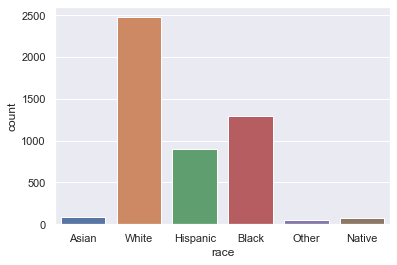

In [39]:
sns.countplot(data= shootings_df, x='race')

# Majority of Whites were killed compared to the other race. This followed by Blacks and the Hispanics.

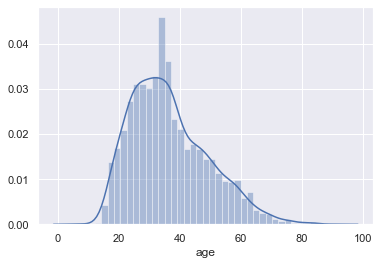

In [29]:
# Visual Distribution of Age

sns.distplot(shootings_df.age)

# Age is skewed to the right. There are more younger people who are killed than older poeple.

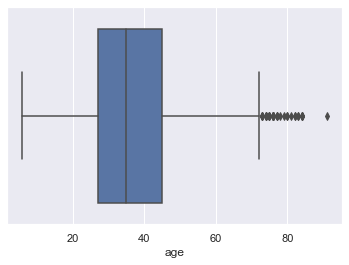

In [30]:
#Box plot for Single Column
sns.boxplot(shootings_df.age)

# The box plot also shows the skewness in the data with some outliers of older people

Text(0.5, 1.0, 'Race of people shot and their ages, categorized by gender')

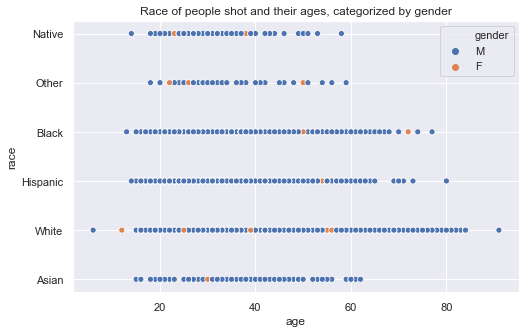

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='race', hue='gender', data=shootings_df)
plt.title("Race of people shot and their ages, categorized by gender")

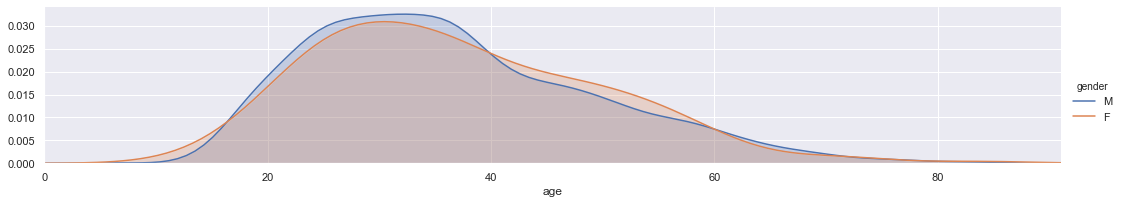

In [32]:
# Hypothesis: More proportion of men were killed over the entire age range

as_fig = sns.FacetGrid(shootings_df, hue='gender', aspect=5)

as_fig.map(sns.kdeplot, 'age', shade=True)

oldest = shootings_df['age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

# More proportion of women below 18 years were killed compared to their males counterparts of the same age. 
#This was also true for ages between 40 and 60 years.

Text(0.5, 1.0, 'Police Shooting with and without body camera, Divided by manner_of_death')

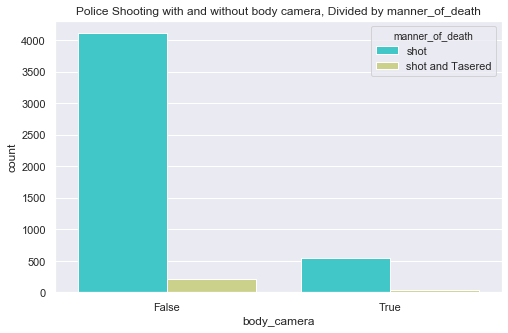

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='body_camera', data=shootings_df, palette='rainbow',hue='manner_of_death')
plt.title("Police Shooting with and without body camera, Divided by manner_of_death")

Text(0.5, 1.0, 'Sanity vs Insanity Divided by threat_level')

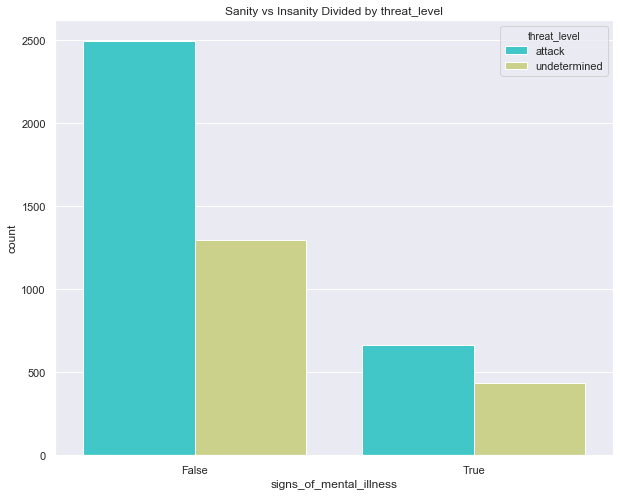

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x='signs_of_mental_illness', data=shootings_df, palette='rainbow',hue='threat_level')
plt.title("Sanity vs Insanity Divided by threat_level")

Text(0.5, 1.0, 'Sanity vs Insanity behaviour Divided by arms_category')

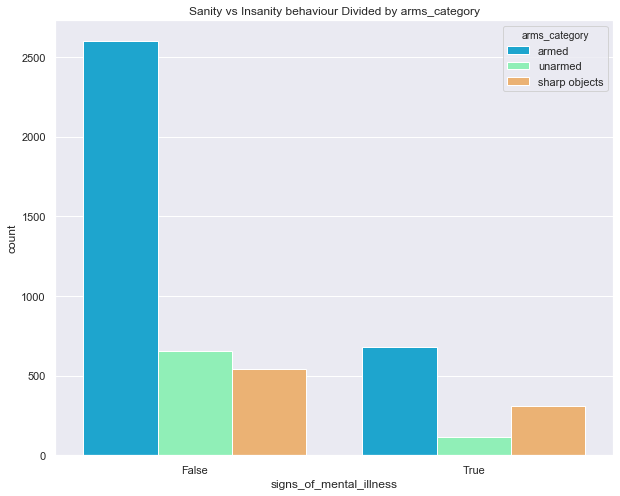

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='signs_of_mental_illness', data=shootings_df, palette='rainbow',hue='arms_category')
plt.title("Sanity vs Insanity behaviour Divided by arms_category")

Text(0.5, 1.0, 'Sanity vs Insanity behaviour Grouped by Fleeing')

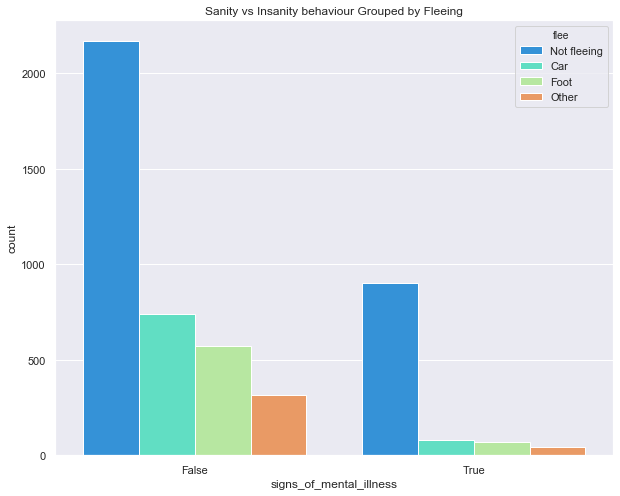

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='signs_of_mental_illness', data=shootings_df, palette='rainbow',hue='flee')
plt.title("Sanity vs Insanity behaviour Grouped by Fleeing")